### All candidate classifiers hyperparameter(5)

In [1]:
from sklearn.ensemble import AdaBoostClassifier
param_dist_ada = {'algorithm':['SAMME.R','SAMME'], 
              'n_estimators':[50,100,500],  
              'learning_rate':[1.0,0.1,2.0]}

# default : {'algorithm': 'SAMME.R','base_estimator': None,'learning_rate': 1.0,'n_estimators': 50,'random_state': None}

In [2]:
from sklearn.tree import DecisionTreeClassifier
param_dist_dt = {'criterion':['gini','entropy'],
             'min_samples_split':[2,10,20],
             'min_samples_leaf':[1,9,18]}
# default: criterion: gini, min_samples_split:2,min_samples_leaf:1

In [3]:
from sklearn.neighbors import KNeighborsClassifier
param_dist_knn = {'weights':["uniform", "distance"],
                  'n_neighbors':[5,8,10],
                  'p':[2,1,3]}
# defalut: n_neighbors: 5, weights:uniform, p:2

In [4]:
from sklearn.linear_model import SGDClassifier
param_dist_sgd = {'alpha':[0.0001,1.0],
                  'loss':["hinge", "log", "perceptron"],
                  'penalty':["l2", "l1", "elasticnet"]}
# default: loss:hinge, penalty: l2, alpha:0.0001

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier
param_dist_pac = {'loss':["hinge", "squared_hinge"],
                  'C':[1.0,0.01,0.1],
                  'tol':[None,0.01,1.0]}
# default: C:1.0, loss:hinge, tol: None

### New State

 一些简单化的假设：
 1. 一共5个classifier
 2. 每个clf有三个超参数备选
 3. 超参数相加一共8个
 4. 每个超参数互相不重合 (不一定)
 5. 结构都是 2+3+3 （不一定）

In [73]:
def param_to_dics(params):
    actions = []
    for i,values in param_dist_ada.items():
        for value in values:
            actions.append({i:value})
    return actions

In [74]:
actions = param_to_dics(param_dist_ada)

In [75]:
actions

[{'algorithm': 'SAMME.R'},
 {'algorithm': 'SAMME'},
 {'n_estimators': 50},
 {'n_estimators': 100},
 {'n_estimators': 500},
 {'learning_rate': 1.0},
 {'learning_rate': 0.1},
 {'learning_rate': 2.0}]

In [79]:
import random

In [ ]:
from Basic import name_parameter,name_model,names
class State:
    def __init__(self,path=[],actions=names,level=0,hypername=None):
        self.path = path
        self.actions = actions
        self.level = level
    
    def update_action(self,action):
        if self.level == 0:
            actions = param_to_dics(name_parameter[action])
        elif self.level >= 4 or random.random()>0.9:
            actions = None 
        else:
            actions = param_to_dics(name_parameter[self.path[0]])
        return actions
    
    def update(self,action):
        
        path = self.path + [action]
        actions = self.update_action(action)
        level = self.level + 1
        return State(path=path,actions=actions,level=level)
        
    def update_self(self,action):
        self.path += [action]
        self.actions = self.update_action(action)
        self.level += 1

### classifier runtime

([<matplotlib.axis.XTick at 0x1a1fa6d7f0>,
 <a list of 12 Text xticklabel objects>)

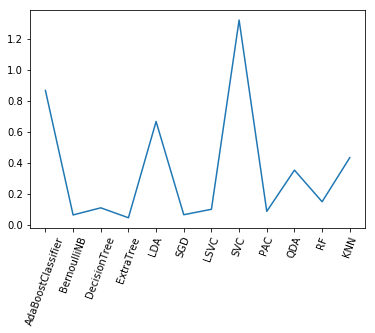

In [30]:
import matplotlib.pyplot as plt
x = [i for i in range(len(times))]
plt.plot(x,times)
plt.xticks(x,names,rotation=70)

In [ ]:
def param_to_actions(params):
    A = []
    for i in params.keys():
        A = A+ params[i]
    return A

def action_to_dic(value,params):
    for i in params.keys():
        if value in params[i]:
            return {i:value}
            break